# **Space X  Falcon 9 First Stage Landing Prediction**

## Assignment:  Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.

## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y, y_predict):
    "this funtion plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax=plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True lables')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

data = pd.read_csv(URL1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

In [6]:
X = pd.read_csv(URL2)

In [7]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [8]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [9]:
# students get this

transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

## TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

<code>X_train, X_test, Y_train, Y_test</code>

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [11]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(72, 83) (72,)
(18, 83) (18,)


## TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr,param_grid=parameters,cv=10) # 하이퍼파라미터: 모델의 최적화를 위한 파라미터 (=우리가 입력하는 값), 각 모델별, 데이터셋별로 다르기 때문에 어떤 파라미터가 모델의 성능을 극대화할지는 하나 하나 찾아야 함 데이터마다 
                                                         # 좋은 파라미터 입력값을 하나하나 찾아주는 작업이 필요한데, 이를 하이퍼 파라미터 튜닝 이라고 하고, 직접 입력값을 하나하나 넣고 결과를 도출해보기 전까지는 어떤 입력값이 좋을 지 전혀 예측할 수가 없다 
                                                         # GridSearchCV 는 이 과정을 도와주는 모듈이나 단점은 느리다
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

### Reference: GridSearch CV
https://dacon.io/codeshare/4568

In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_) # 최적 하이퍼 파라미터 조합을 보여줌
print("accuracy :",logreg_cv.best_score_) # 최고 평균 정확도 수치

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:

Logigistics regression accuracy is:  0.8333333333333334


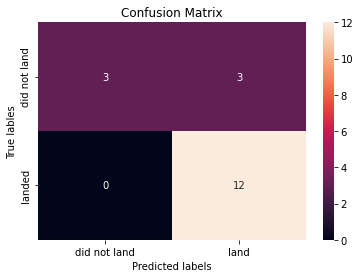

In [16]:
yhat = logreg_cv.predict(X_test)

# 보라 추가
from sklearn import metrics
lr_accuracy = metrics.accuracy_score(Y_test, yhat)
print("Logigistics regression accuracy is: ", lr_accuracy) 

plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.

## TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [17]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()

In [18]:

svm_cv = GridSearchCV(svm, param_grid = parameters, cv = 10, scoring='accuracy', refit=True)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7

Calculate the accuracy on the test data using the method <code>score</code>

In [20]:
yhat = svm_cv.predict(X_test) 

from sklearn import metrics
svm_accuracy = metrics.accuracy_score(Y_test, yhat)

We can plot the confusion matrix

Support Vector Machine accuracy is:  0.8333333333333334


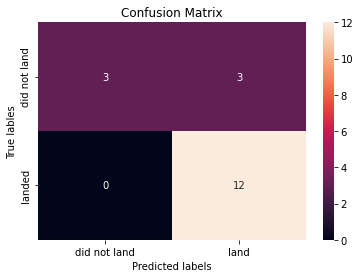

In [21]:
print("Support Vector Machine accuracy is: ", svm_accuracy)
      
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [22]:
parameters = {'criterion': ['gini', 'entropy'], # criterion : 분할 성능 측정 기능
     'splitter': ['best', 'random'], 
     'max_depth': [2*n for n in range(1,10)], # 트리의 최대 깊이, 깊이가 깊어지면 과적합될 수 있음.
     'max_features': ['auto', 'sqrt'], # 최적의 분할을 위해 고려할 최대 feature 개수 (default = None : 데이터 세트의 모든 피처를 사용)
     'min_samples_leaf': [1, 2, 4], # 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 (과적합 제어 용도), 작게 설정 필요
     'min_samples_split': [2, 5, 10]} # 리프노드의 최대 개수

tree = DecisionTreeClassifier()

In [23]:
tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10, scoring='accuracy', refit=True)
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


## TASK  9

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

We can plot the confusion matrix

Decision Tree accuracy is:  0.8333333333333334


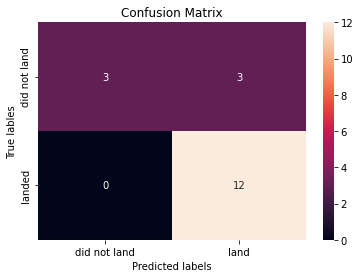

In [25]:
yhat = tree_cv.predict(X_test)

from sklearn import metrics

dt_accuracy = metrics.accuracy_score(Y_test, yhat)
print("Decision Tree accuracy is: ", dt_accuracy)

plot_confusion_matrix(Y_test,yhat)

## TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [26]:
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1, 2]}
              
KNN = KNeighborsClassifier()

In [27]:
knn_cv = GridSearchCV(KNN, param_grid = parameters, cv=10, scoring='accuracy', refit=True)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [28]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

KNN accuracy is:  0.8333333333333334


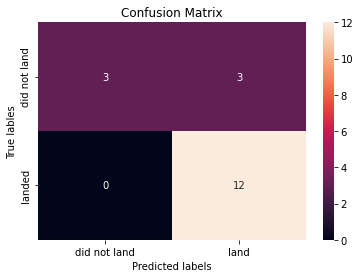

In [29]:
yhat = knn_cv.predict(X_test)

knn_accuracy = metrics.accuracy_score(Y_test, yhat)

print("KNN accuracy is: ", knn_accuracy)

plot_confusion_matrix(Y_test, yhat)

We can plot the confusion matrix

## TASK  12

Find the method performs best:

#### Result:

* **Logistics Regression** : Accuracy score: *0.83* | True Positive: *12* | False Positive: | *3* | Best score from GridSearch: *0.846*
* **Support Vector Machine** : Accuracy score: *0.83* | True Positive: *12* | False Positive: | *3* | Best score from GridSearch: *0.848*
* **Decision Tree** : Accuracy score: *0.83* | True Positive: *12* | False Positive: | *3* | Best score from GridSearch: *0.877*
* **KNN** : Accuracy score: *0.83* | True Positive: *12* | False Positive: | *3* | Best score from GridSearch: *0.848*

In [30]:
print(lr_accuracy, svm_accuracy, dt_accuracy, knn_accuracy) 

0.8333333333333334 0.8333333333333334 0.8333333333333334 0.8333333333333334


### Graph (for presentation)

In [70]:
z = pd.DataFrame({'Model':['Logistics Regression', 'SVM', 'Decision Tree', 'KNN'],
                  'Accuracy': [lr_accuracy, svm_accuracy, dt_accuracy, knn_accuracy]
                  })

In [71]:
z

,Model,Accuracy
0,Logistics Regression,0.833333
1,SVM,0.833333
2,Decision Tree,0.833333
3,KNN,0.833333


In [72]:
for index, data in enumerate(z['Accuracy']):
    print(index, data)

0 0.8333333333333334
1 0.8333333333333334
2 0.8333333333333334
3 0.8333333333333334


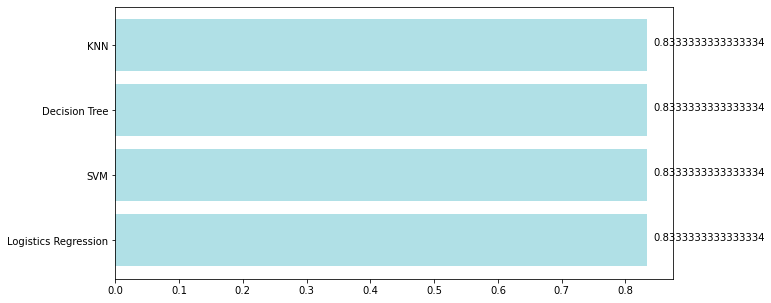

In [73]:
fig, ax = plt.subplots(figsize = (10,5))

ax.barh(z['Model'], z['Accuracy'], color='powderblue')

for index, data in enumerate(z['Accuracy']):
    plt.text(x=data + 0.01, y=index, s=f"{data}")

plt.show()